In [ ]:
!pip install opencv-python numpy matplotlib scikit-learn tensorflow keras pillow streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


Saving braintumour1.webp to braintumour1.webp


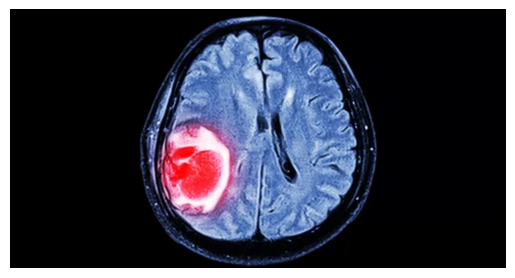

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()

# Get image path
image_path = list(uploaded.keys())[0]

# Open the image using PIL
image = Image.open(image_path)

# Display image using Matplotlib
plt.imshow(image)
plt.axis("off")  # Hide axis for better visualization
plt.show()

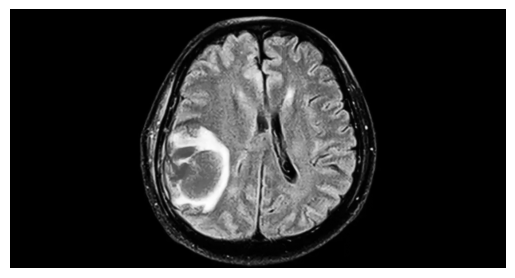

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Ensure the image path is correct and the file exists.
image_path = "braintumour1.webp"  # Replace with the correct path if needed
image = cv2.imread(image_path)

# Check if the image was loaded successfully.
if image is None:
    print(f"Error: Could not load image at '{image_path}'")
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    cv2.imwrite("gray_braintumour1.webp", gray_image)  # Save the grayscale image

    # Display the image using Matplotlib instead of cv2_imshow and waitKey
    plt.imshow(gray_image, cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Hide axis for better visualization
    plt.show()

    # Remove cv2.waitKey(0) and cv2.destroyAllWindows()

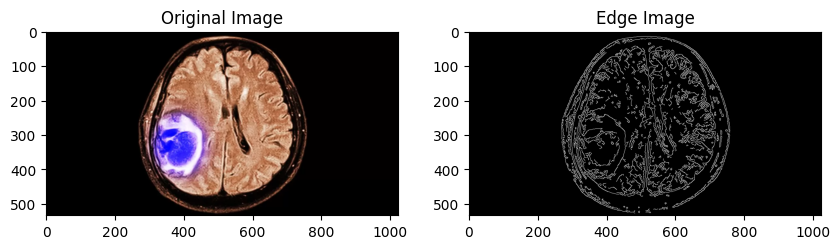

In [ ]:
import cv2
import matplotlib.pyplot as plt

# ... (previous code to load and display the grayscale image) ...

# Perform edge detection using Canny (or any other method)
edges = cv2.Canny(gray_image, 100, 200)  # Adjust thresholds as needed

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge Image') # Now 'edges' is defined
plt.show()

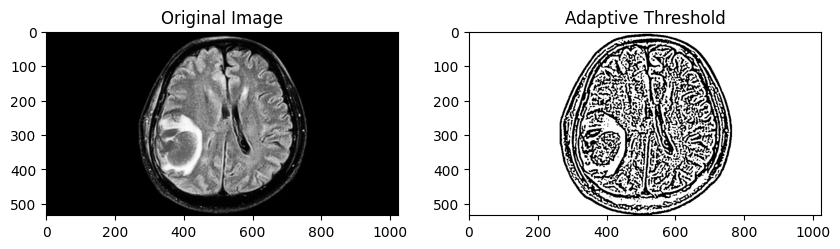

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('braintumour1.webp', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5,5), 0)

# Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(adaptive_thresh, cmap='gray'), plt.title('Adaptive Threshold')
plt.show()

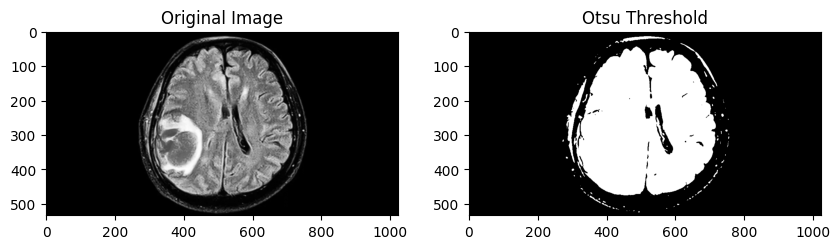

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('braintumour1.webp', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Otsu’s Thresholding
_, otsu_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(otsu_thresh, cmap='gray'), plt.title('Otsu Threshold')
plt.show()

In [ ]:
import unittest

class TestExample(unittest.TestCase):
    def test_addition(self):
        self.assertEqual(2 + 2, 4)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


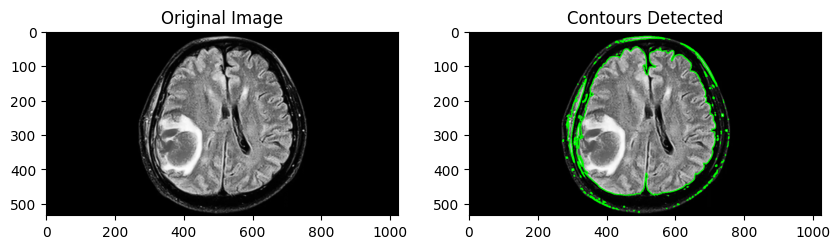

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('braintumour1.webp', cv2.IMREAD_GRAYSCALE)

# ... (Your existing code for preprocessing) ...

# Find contours
# Assuming otsu_thresh is your binary image from previous processing
contours, _ = cv2.findContours(otsu_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert grayscale to color for better visualization
cv2.drawContours(contour_img, contours, -1, (0,255,0), 2)  # Draw contours in green

# Display results
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(contour_img), plt.title('Contours Detected')
plt.show()

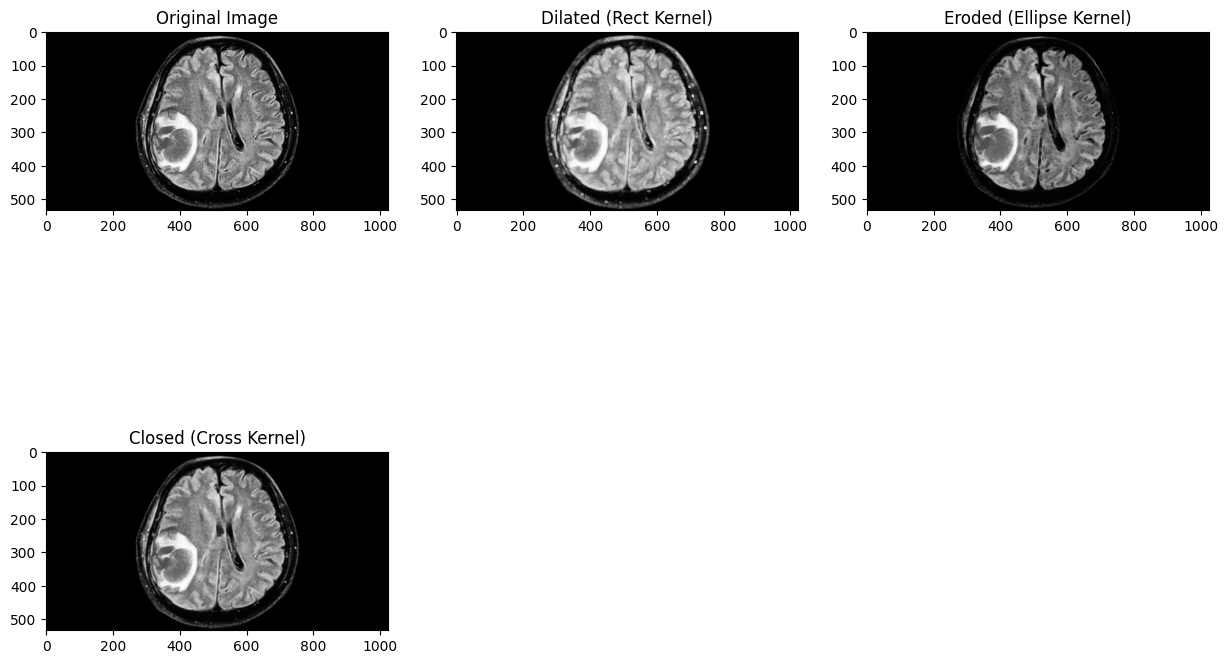

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('braintumour1.webp', cv2.IMREAD_GRAYSCALE)

# Define different structuring elements
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

# Apply morphological operations with different kernels
dilated_rect = cv2.dilate(image, kernel_rect, iterations=1)
eroded_ellipse = cv2.erode(image, kernel_ellipse, iterations=1)
closed_cross = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_cross)

# Display results
plt.figure(figsize=(15,10))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(dilated_rect, cmap='gray'), plt.title('Dilated (Rect Kernel)')
plt.subplot(233), plt.imshow(eroded_ellipse, cmap='gray'), plt.title('Eroded (Ellipse Kernel)')
plt.subplot(234), plt.imshow(closed_cross, cmap='gray'), plt.title('Closed (Cross Kernel)')
plt.show()

In [ ]:
from tqdm import tqdm
import time

for i in tqdm(range(100)):
    time.sleep(0.1)  # Simulating loading

100%|██████████| 100/100 [00:10<00:00,  9.89it/s]


In [ ]:
from tqdm import tqdm
import time

for epoch in tqdm(range(10)):
    time.sleep(1)  # Simulating training time


100%|██████████| 10/10 [00:10<00:00,  1.00s/it]
